## **Diamond Price Prediction Projects**
### **Business Understanding**
Diamonds are among the most valuable natural substances, primarily composed of carbon. Unlike gold or silver, pricing diamonds is more complex due to various features influencing their value, such as structure, cut, carat, clarity, and inclusions (impurities).

The pricing system for diamonds is standardized globally through the "four Cs" â€” Cut, Color, Clarity, and Carat, which allows uniform understanding and ease of trade. These metrics determine the quality and price of diamonds.

### **Understanding the 4 C's**
- **Cut:** Refers to how well a diamond is cut, impacting its brilliance.
- **Color:** A measure of how colorless a diamond is (ranging from D, which is colorless, to J, - which is light yellow).
- **Clarity:** Refers to the internal purity of the diamond (graded from I1, which is the worst, to IF, which is flawless).
- **Carat:** The weight of the diamond.

### **Problem Statement**
We aim to build a system that can predict the price of a diamond based on features such as carat, cut, color, clarity, and its dimensions (x, y, z). This project will walk through steps like data preprocessing, model building, and prediction.

### **Agenda**
In this notebook, we will perform:
- Step:-1) Import necessary libraries and load the datasets
- Step:-2) Preform Exploratory Data Analysis (EDA)
- Step:-3) Split the Data into Train and Test Data
- Step:-4) Data Preparations: Data Cleaning 
- Step:-5) Data Preparations: Feature Transformations (in both train and test data)
- Step:-6) Training and Testing Phase: Building a Models
- Step:-7) Model Evaluation and Predictions

### **Step:-1) Import necessary libraries and load the datasets**

In [9]:
# import neccessary libraries and load the datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv("Datasets/diamonds.csv")

# Display the few row of the datasets
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
# Display the columns of the dataset
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
# Display the shape of the dataset
data.shape

(53940, 10)

In [5]:
# Display the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### **Data Description**

| Feature | Description |
|---------|-------------|
| price   | Price in US dollars (ranging from $326 to $18,823) |
| carat   | Weight of the diamond (0.2 - 5.01) |
| cut     | Quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color   | Diamond color (ranging from J, the worst, to D, the best) |
| clarity | Measurement of how clear the diamond is (I1 to IF) |
| x       | Length in mm (0 - 10.74) |
| y       | Width in mm (0 - 58.9) |
| z       | Depth in mm (0 - 31.8) |
| depth   | Total depth percentage (43 - 79) |
| table   | Width of the top of the diamond (43 - 95) |


### **Step:-2) Preform Exploratory Data Analysis (EDA)**
- A) Univariate Analysis ---> Numerical Columns (carat, depth and table)
- B) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (carat, depth, table)
- C) Univariate Analysis ---> Numerical Columns (x, y, z)
- D) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (x, y, z)
- E) Univariate Analysis ---> Categorical Columns (cut, color and clarity)
- F) Bivariate Analysis ---> Numerical (Target column: Price) vs Categorical Columns (cut, color and clarity)

#### **A) Univariate Analysis ---> Numerical Columns (carat, depth and table)**


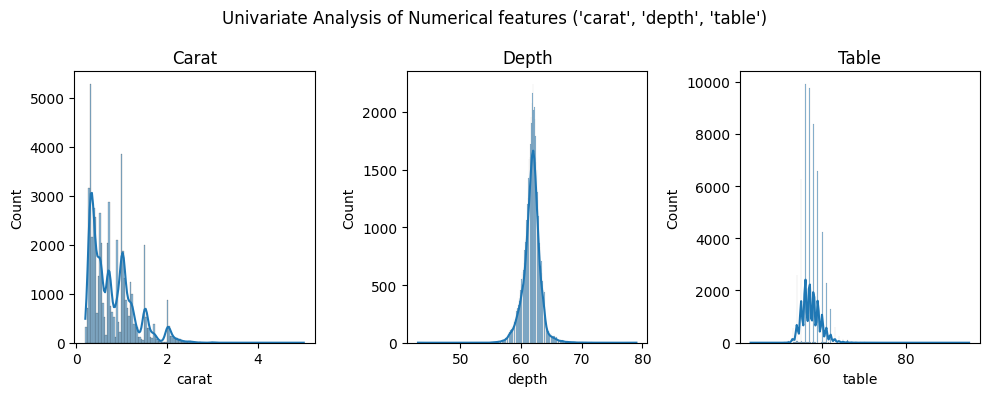

In [43]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle("Univariate Analysis of Numerical features ('carat', 'depth', 'table')")

# Plot the histogram of carat features
ax[0].set_title("Carat")
sns.histplot(data=data, x='carat', kde=True, ax=ax[0])

# Plot the histogram of depth features
ax[1].set_title("Depth")
sns.histplot(data=data, x='depth', kde=True, ax=ax[1])

# Plot the histogram of table features
ax[2].set_title("Table")
sns.histplot(data=data, x='table', kde=True, ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()

#### **B) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (carat, depth, table)**


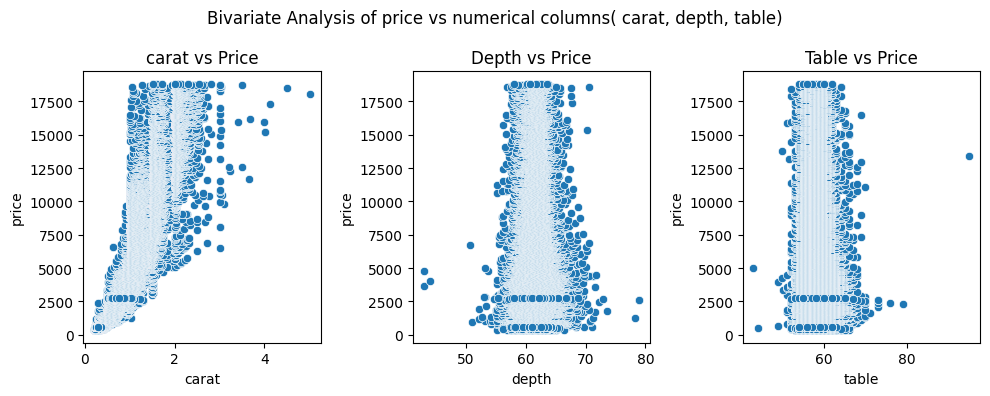

In [40]:
# Create a 1x3 grid of subplots for scatter plots
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle("Bivariate Analysis of price vs numerical columns( carat, depth, table)")

# Plot the scatter plot of carat vs price
ax[0].set_title("carat vs Price")
sns.scatterplot(data=data, x = "carat", y = "price", ax=ax[0])

# Plot the scatter plot of depth vs price
ax[1].set_title("Depth vs Price")
sns.scatterplot(data=data, x = "depth", y = "price", ax=ax[1])

# Plot the scatter plot of table vs price
ax[2].set_title("Table vs Price")
sns.scatterplot(data=data, x = "table", y = "price", ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()

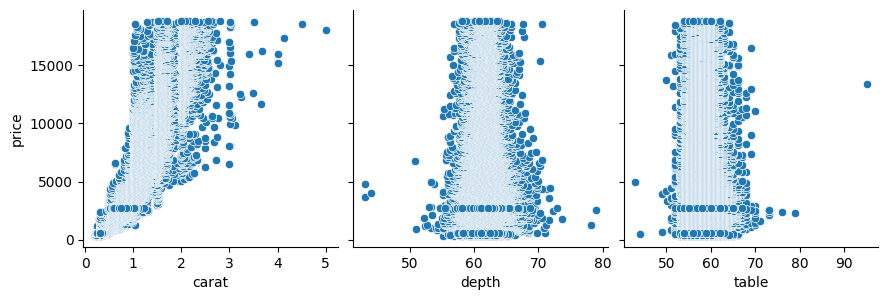

In [36]:
# Pairplot to visualize the relationship between 'price' and selected numerical features
sns.pairplot(data=data, x_vars=["carat", "depth", "table"], y_vars="price", height=3)
plt.show()

#### **C) Univariate Analysis ---> Numerical Columns (x, y, z)**


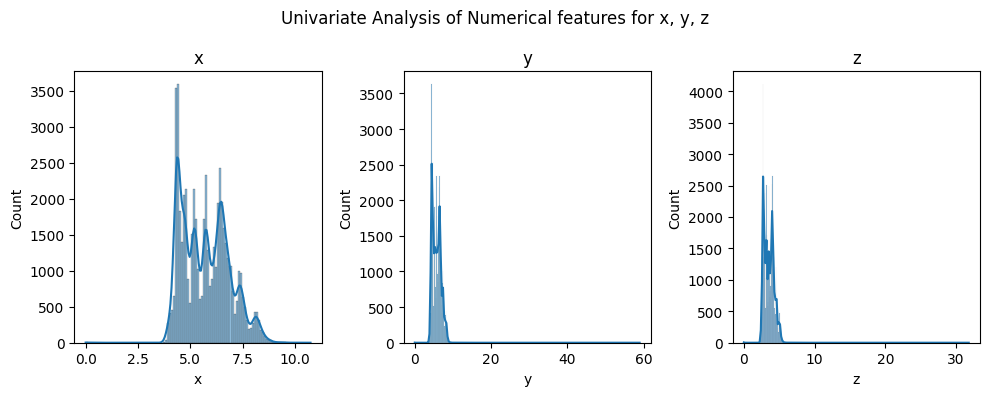

In [44]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle("Univariate Analysis of Numerical features for x, y, z")

# Plot the histogram of x features
ax[0].set_title("x")
sns.histplot(data=data, x='x', kde=True, ax=ax[0])

# Plot the histogram of y features
ax[1].set_title("y")
sns.histplot(data=data, x='y', kde=True, ax=ax[1])

# Plot the histogram of z features
ax[2].set_title("z")
sns.histplot(data=data, x='z', kde=True, ax=ax[2])

plt.tight_layout()
plt.show()

#### **D) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (x, y, z)**


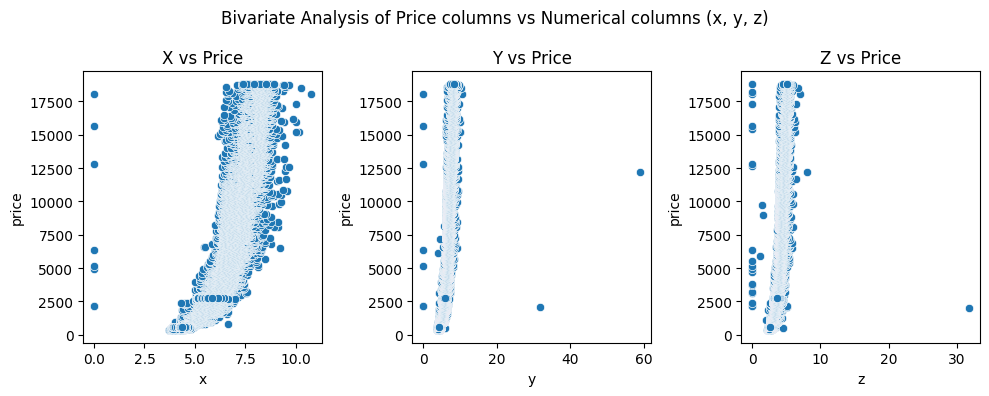

In [45]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle("Bivariate Analysis of Price columns vs Numerical columns (x, y, z)")

# Plot the scatter plot of x vs rice
ax[0].set_title("X vs Price")
sns.scatterplot(data=data, x = "x", y = "price", ax=ax[0])

# Plot the scatter plot of y vs price
ax[1].set_title("Y vs Price")
sns.scatterplot(data=data, x = "y", y = "price", ax=ax[1])

# Plot the scatter plot of z vs price
ax[2].set_title("Z vs Price")
sns.scatterplot(data=data, x = "z", y = "price", ax=ax[2])

# Adjust the layout
plt.tight_layout()
plt.show()